## PROJECT - STATE CRIME STATISTICS

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az

In [37]:
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [4]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [5]:
california = df.loc[df['State'] == 'California']
california.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
240,California,1960,15717204,3235.4,910.5,1984.8,340.1,239.0,119.6,3.9,...,97.3,508511,143102,311956,53453,37558,18796,616,2859,15287
241,California,1961,16397000,3177.5,894.2,1950.6,332.7,232.7,120.0,3.7,...,90.5,521008,146615,319834,54559,38154,19684,605,3033,14832
242,California,1962,16970000,3326.2,934.1,2052.9,339.2,234.8,121.7,3.9,...,91.9,564451,158523,348373,57555,39846,20645,657,2946,15598
243,California,1963,17590000,3545.8,998.9,2184.7,362.2,241.2,126.3,3.8,...,93.6,623709,175703,384289,63717,42419,22208,673,3080,16458
244,California,1964,18084000,3874.3,1088.7,2366.5,419.1,265.6,138.2,4.1,...,103.2,700630,196883,427960,75787,48026,24998,740,3621,18667


# Correct the data -> guess which data come from which column - to delete/modify later

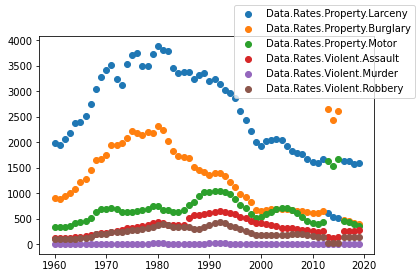

In [6]:
#sns.scatterplot(data=california, x = 'Year', y = 'Data.Population', hue = 'State')
fig,ax = plt.subplots()

#ax.scatter(data=california, x = 'Year', y = 'Data.Population')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Motor')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Murder')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.All')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Rape')
fig.legend()
#sns.scatterplot(df['Year'], df['Data.Population'], hue = 'State')

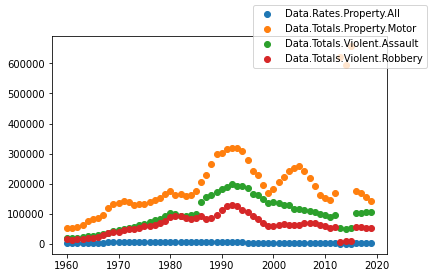

In [54]:
fig,ax = plt.subplots()


ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.All')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.Larceny')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.Burglary')
ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Property.Motor')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.All')
ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Assault')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Murder')
ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Robbery')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Assault')
#ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Violent.Robbery')
#ax.scatter(data=california, x = 'Year', y = 'Data.Totals.Violent.Rape')
fig.legend()

# Basic analysis of the data

Text(0, 0.5, 'Population')

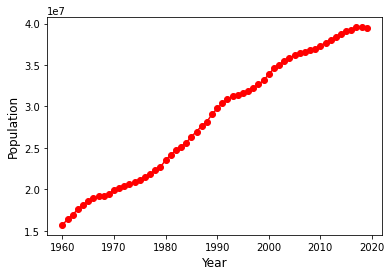

In [38]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(california['Year'], california['Data.Population'], color="red", marker = 'o')
# set x-axis label
ax.set_xlabel("Year",fontsize=12)
# set y-axis label
ax.set_ylabel("Population",fontsize=12)

Text(0.5, 1.0, 'Larceny rates in California')

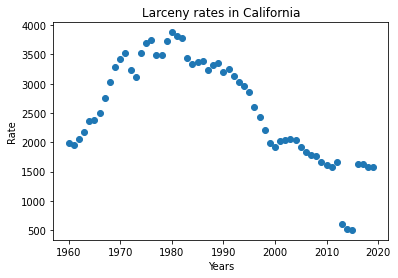

In [39]:
fig,ax = plt.subplots()
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")

array([[<AxesSubplot:title={'center':'Data.Rates.Property.Larceny'}>]],
      dtype=object)

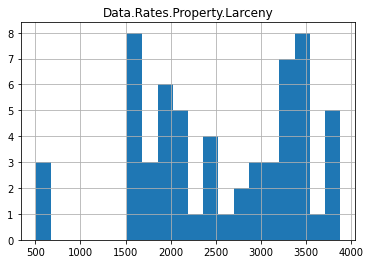

In [14]:
california_larceny = california.filter(['Year', 'Data.Rates.Property.Larceny'], axis = 1)
#california_larceny.hist(column = 'Data.Rates.Property.Larceny', bins = 20)
#print(california_larceny)

In [15]:
california_larceny.describe()

,Year,Data.Rates.Property.Larceny
count,60.000000,60.000000
mean,1989.500000,2567.741667
std,17.464249,878.078457
min,1960.000000,504.300000
25%,1974.750000,1922.125000
50%,1989.500000,2555.650000
75%,2004.250000,3346.200000
max,2019.000000,3880.000000


In [59]:
mean_larceny = round(california_larceny["Data.Rates.Property.Larceny"].mean())
print(mean_larceny)
std_larceny = round(california_larceny["Data.Rates.Property.Larceny"].std())
print(std_larceny)

2568
878


In [73]:
california_larceny_df=pd.DataFrame(california_larceny["Data.Rates.Property.Larceny"]).to_numpy().flatten()
print(california_larceny_df)
#print(dfc["Data.Rates.Property.Larceny"])

[1984.8 1950.6 2052.9 2184.7 2366.5 2388.  2506.2 2748.8 3032.3 3282.7
 3422.1 3517.9 3242.  3123.6 3525.5 3703.7 3745.8 3499.8 3488.8 3732.6
 3880.  3816.1 3785.1 3444.5 3346.1 3379.4 3383.9 3240.2 3314.5 3346.5
 3197.5 3246.  3137.8 3029.1 2957.7 2856.9 2605.1 2430.9 2217.1 1994.2
 1924.5 2016.6 2044.7 2062.7 2033.1 1915.  1835.3 1790.6 1770.2 1665.
 1608.4 1584.  1669.5  605.4  522.3  504.3 1623.  1623.9 1571.8 1586.3]


# Prior predictive check

In [45]:
normal_model1 = CmdStanModel(stan_file = 'normal1.stan')
stan_data={"data_mu": mean_larceny, "data_sigma": std_larceny}
R = 60 #bc the data has been collected for 60 years
sim = normal_model1.sample(data=stan_data, iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 31052022)
mu_sim = sim.stan_variable('mu')
sigma_sim = sim.stan_variable('sigma')
prior = sim.stan_variable('prior')

INFO:cmdstanpy:compiling stan file /home/kasia/Documents/DataAnalytics/Project/normal1.stan to exe file /home/kasia/Documents/DataAnalytics/Project/normal1
INFO:cmdstanpy:compiled model executable: /home/kasia/Documents/DataAnalytics/Project/normal1
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [46]:
print((mu_sim))
print(len(sigma_sim))
print(len(prior))

[3788.78  3246.5   2652.95  1702.05  2238.12  1215.96  2569.85  3239.68
 3279.54   416.762 4094.31  2406.42  3288.73  2910.95  2804.71  2508.71
 2401.73  2401.84  1628.63  2990.92  2077.34  1842.49  1353.84  2399.54
 3461.49  1286.29  3898.66  3009.61  1204.5   2066.37   129.576 3697.12
 2874.38  2694.46  3683.04  1563.73  3027.72  3642.51  2773.64  3094.27
 3008.95  2213.42  1772.71  2363.3   3639.3   3049.47  1440.52  2060.75
 3348.62  1704.08  3553.22  2442.89  1544.29  1138.14  2993.17  3167.97
 2646.13  3601.48  3247.86  2674.03 ]
60
60


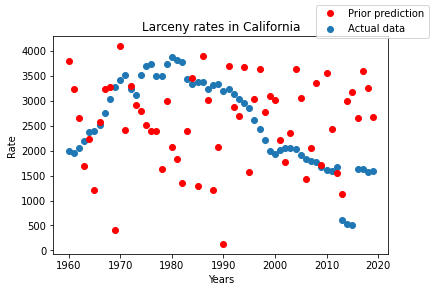

In [47]:
fig,ax = plt.subplots()
x= list(range(1960,2020))
plt.plot(x, prior, "o", color = 'red', label = 'Prior prediction')
ax.scatter(data=california, x = 'Year', y = 'Data.Rates.Property.Larceny', label = 'Actual data')
#ax.scatter(data=prior, x = 'Year', y = 'Data.Rates.Property.Larceny')
ax.set_ylabel("Rate")
ax.set_xlabel("Years")
ax.set_title("Larceny rates in California")
fig.legend()

### <code style = "background:yellow;color:black">**Nie wiem co zrobic z tymi histogramami - jak one spelniaja funkcje i czy sa wgl potrzebne?**
</code>
Wygladaja jakby przedstawialy histogramy z rzeczywistych danych, a nie z modelu....

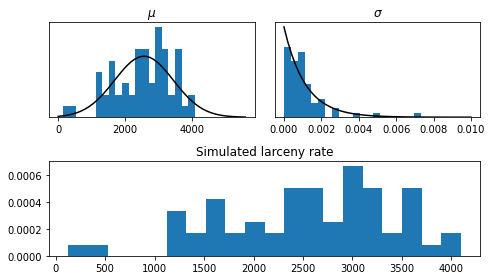

In [48]:
fig = plt.figure(figsize = (7, 4))

gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[1, :])
ax1.hist(prior, bins = 20, density = True)
ax1.set_title('Simulated larceny rate')

ax2 = fig.add_subplot(gs[0, 0])
ax2.hist(mu_sim, bins = 20, density = True)
x = np.linspace(0, 5599)
y = stats.norm.pdf(x, loc = 2568, scale = 878)
ax2.plot(x, y, 'black')
ax2.set_title('$\mu$')
ax2.set_yticks([])

ax3 = fig.add_subplot(gs[0, 1])
ax3.hist(sigma_sim, bins = 20, density = True)
x = np.linspace(0, 0.01)
y = stats.expon.pdf(x, scale = 1/878)
ax3.plot(x, y, color = 'black')
ax3.set_title('$\sigma$')
ax3.set_yticks([])

fig.tight_layout()
plt.show()

# Posterior 

In [85]:
normal1_fit_model = CmdStanModel(stan_file='normal1_fit.stan')
stan_data2 = {"N": len(california_larceny), "larceny_data" : california_larceny_df}
normal1_fit = normal1_fit_model.sample(data = stan_data2,iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                                   seed = 31052022)

INFO:cmdstanpy:compiling stan file /home/kasia/Documents/DataAnalytics/Project/normal1_fit.stan to exe file /home/kasia/Documents/DataAnalytics/Project/normal1_fit
INFO:cmdstanpy:compiled model executable: /home/kasia/Documents/DataAnalytics/Project/normal1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/kasia/Documents/DataAnalytics/Project/normal1_fit.hpp /home/kasia/Documents/DataAnalytics/Project/normal1_fit.stan
Warning in '/home/kasia/Documents/DataAnalytics/Project/normal1_fit.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I 

chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [86]:
larceny_posterior = normal1_fit.stan_variable(var='larceny_posterior')
print(larceny_posterior)

[-0.220311  -0.463233  -0.698985  -0.0567073 -0.291832   0.404272
 -1.44146   -1.33571   -1.64756   -0.237705  -0.820555  -0.0468978
  0.360368  -1.80285   -0.145208  -0.396665  -0.501762  -1.35961
  0.234426   0.141938  -1.21536   -0.224019   0.18024    0.265577
 -0.527211  -2.57087   -0.79712    0.25255    0.963234  -1.44078
 -0.717251  -0.65882   -0.497725   1.32133    0.18908   -1.33317
  1.51696   -0.173967  -1.62444   -0.845313  -0.276068   0.0774964
  0.0447379 -0.560514  -0.244343  -0.977944  -0.663321   0.833618
 -0.381422  -0.663217  -0.715388   0.437991  -1.40627   -0.240691
 -0.900577  -0.0971207 -0.168085  -1.87637   -0.975057  -1.88562  ]


In [88]:
az.summary(normal1_fit, var_names=['mu', 'sigma'], round_to = 3, kind='stats')

,mean,sd,hdi_3%,hdi_97%
mu,-0.504,0.0,-0.504,-0.504
sigma,0.844,0.0,0.844,0.844
